# In this project, we will work on data cleaning and visualization for a data set containing applications on the Play Store

# Introduction to the Data
* First 5 Rows of the Data
* Random 5 Rows from the Data
* Number of Rows and Columns in the Data
* General Information about the Data
* Column Names in the Data
* Number of Null Values

# Data Cleaning and Processing
* Renaming Columns
* Replacing Missing Values with Mean
* Removing Missing Values
* Changing Data Types
* Combining similar values
* Preparing Data for Visualization


# Data Visualization
* Payment Information and App Rating
* App Rating by Type
* Content Ratings and App Ratings
* Number of Apps per Category
* Price and Category Relationship

# 1) Introduction to the Data

In [377]:
import pandas as pd
data = pd.read_csv("C:/Users/solma/Downloads/archive (2)/googleplaystore.csv")
data.head(5) #Let's look at first 5 rows of data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [378]:
data.sample(5) #Let's look at random 5 rows of data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5794,Axetatic - Axe Throwing Game,GAME,4.6,29,31M,"1,000+",Free,0,Everyone 10+,Arcade,"October 22, 2017",1.3.3,4.2 and up
9936,Strawberry Shortcake Ice Cream Island,FAMILY,4.2,32200,15M,"5,000,000+",Free,0,Everyone,Casual;Pretend Play,"November 6, 2017",1.2,4.1 and up
6135,BG TV App,FAMILY,1.7,6,2.9M,100+,Free,0,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up
3494,Hacker's Keyboard,PRODUCTIVITY,4.4,41418,1.2M,"1,000,000+",Free,0,Everyone,Productivity,"December 11, 2016",v1.39.3,2.2 and up
870,H TV,ENTERTAINMENT,4.3,103078,5.6M,"5,000,000+",Free,0,Everyone,Entertainment,"July 5, 2018",4.6.2,2.3.3 and up


In [379]:
data.size #Size of the Data

140933

In [380]:
data.shape #Let's look at the shape of the dataset.

(10841, 13)

In [381]:
data.info(5) #Get information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Reviews,Size,Installs,Price columns must be numeric values.*
*Last Updated column must be datetime values*

In [382]:
data.columns #We get to know our columns.

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

*Column names should not contain spaces.*

In [383]:
data.isnull().sum() #We check the sum of null values.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

*Missing values should be cleaned*

# 2) Data Cleaning and Processing

In [384]:
#We replace spaces in the column name with _.
data.columns = data.columns.str.replace(" ","_")   
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [385]:
# We replace the null values ​​in the rating column with median and delete the other missing values.

rating_median = data.Rating.median()
data.Rating.fillna(rating_median,inplace=True)
data.dropna(inplace=True)

In [418]:
data.isnull().sum().sum()  #We check that null values ​​are equal to 0.

0

In [387]:
data.Reviews = pd.to_numeric(data.Reviews) #Reviews column was converted to int64 type

In [388]:
# Delete the letters M and k in the size column.
data.Size.replace("M"," ",regex=True,inplace=True)
data.Size.replace("k"," ",regex=True,inplace=True)

In [389]:
# Replace + and , values ​​ with spaces in the Install column
data.Installs = data.Installs.str.replace('[+,]', '', regex=True).str.replace(' ', '')

In [390]:
# Convert the İnstalls column to numeric type
data.Installs = pd.to_numeric(data.Installs)

In [391]:
# Remove $ and spaces from 'Price' values
data.Price = data.Price.str.replace('[$]', '', regex=True).str.replace(' ', '')

In [392]:
# Convert the Price column to numeric type
data.Price = pd.to_numeric(data.Price)

In [393]:
data.Genres.head(5) #Let's look at the first 5 rows of the Genres column

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [394]:
# Split the Genres column values by ';' and keep the first part
data.Genres = data.Genres.str.split(";").str[0] 

In [395]:
data.Genres.unique() #Get unique values in the 'Genres' column

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [396]:
data.Genres.value_counts().tail(5) 

Genres
Trivia           39
Casino           39
Word             29
Music            25
Music & Audio     1
Name: count, dtype: int64

In [397]:
# Replace 'Music and Audio' with 'Music' in the Genres column and print the last 10 rows
data.Genres.replace("Music & Audio","Music",regex=True,inplace=True)
data.Genres.value_counts().tail(5)

Genres
Card      51
Trivia    39
Casino    39
Word      29
Music     26
Name: count, dtype: int64

In [398]:
data.Last_Updated = pd.to_datetime(data.Last_Updated) # Convert Last_Updated column to datetime format.

In [399]:
data.info() #Let's talk about data again.

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  object        
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content_Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last_Updated    10829 non-null  datetime64[ns]
 11  Current_Ver     10829 non-null  object        
 12  Android_Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [400]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


In [401]:
# Mean and Median Values for Rating, Reviews, and Installs columns

In [402]:
median_Rating = round(data.Rating.median(), 2)
mean_Rating = round(data.Rating.mean(), 2)
print(f"Median Rating: {median_Rating}, Mean Rating: {mean_Rating}")

Median Rating: 4.3, Mean Rating: 4.21


In [403]:
median_Reviews = round(data.Reviews.median(), 1)
mean_Reviews = round(data.Reviews.mean(), 1)
print(f"Median Reviews: {median_Reviews}, Mean Reviews: {mean_Reviews}")

Median Reviews: 2100.0, Mean Reviews: 444601.8


In [404]:
median_Installs = round(data.Installs.median(), 1)
mean_Installs = round(data.Installs.mean(), 1)
print(f"Median Installs: {median_Installs}, Mean Installs: {mean_Installs}")

Median Installs: 100000.0, Mean Installs: 15479901.8


In [405]:
# Mode Values for Genres and Content_Rating columns

In [406]:
data.Content_Rating.mode()

0    Everyone
Name: Content_Rating, dtype: object

In [407]:
data.Genres.mode()

0    Tools
Name: Genres, dtype: object

# 3) Data Visualization

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

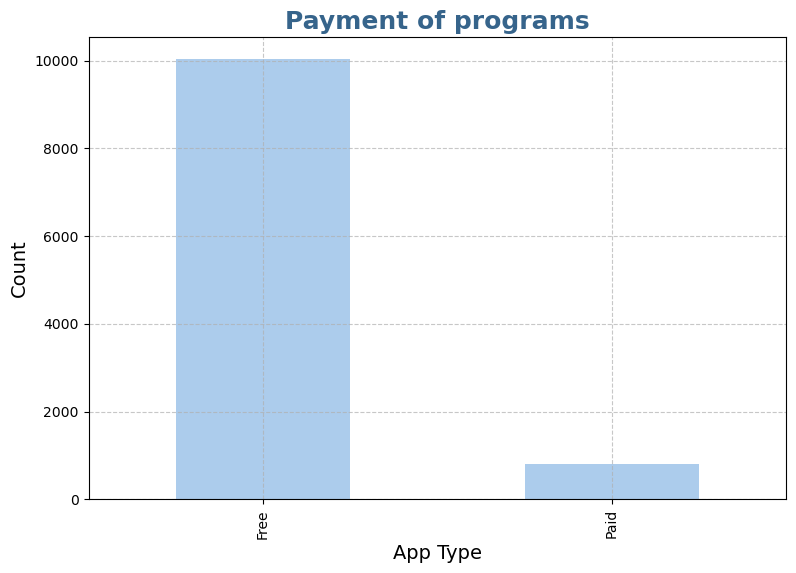

In [409]:
plt.figure(figsize=(9, 6))
data.Type.value_counts().plot(kind="bar", color='#acccec')
plt.title("Payment of programs", size=18,fontweight='bold',color = "#36648b")
plt.xlabel("App Type", size=14)
plt.ylabel("Count", size=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

*The number of free apps constitutes a large portion of the total number of apps.*

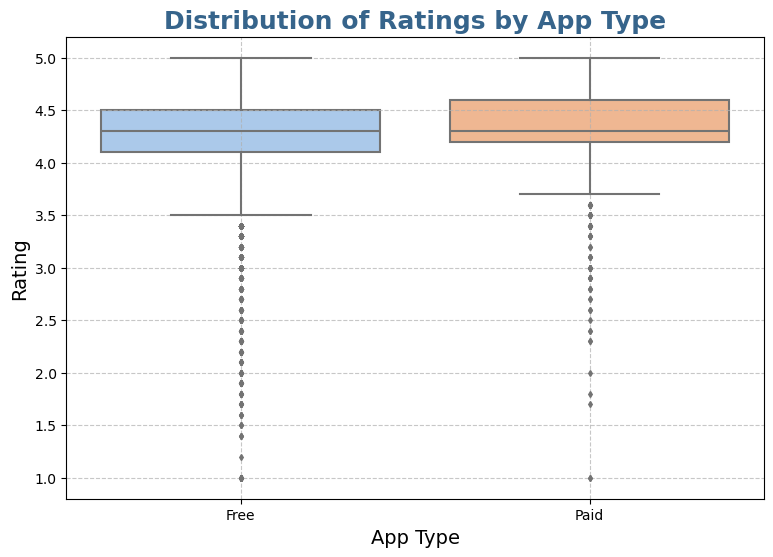

In [410]:
plt.figure(figsize=(9, 6))
sns.boxplot(x = "Type", y = "Rating", data = data,palette= 'pastel',linewidth=1.5, fliersize=3)
plt.title("Distribution of Ratings by App Type", size=18,fontweight='bold',color = "#36648b")
plt.xlabel("App Type", size=14)
plt.ylabel("Rating", size=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

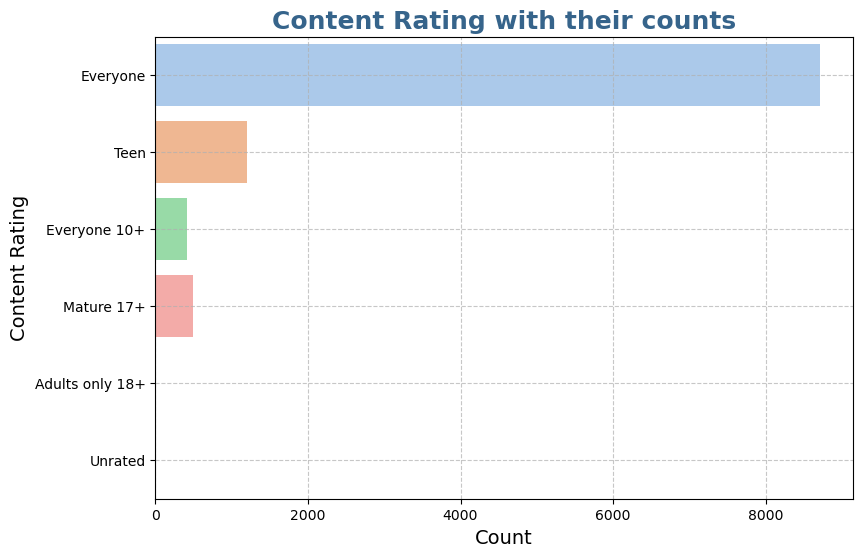

In [411]:
plt.figure(figsize=(9, 6))
sns.countplot(y = "Content_Rating", data = data,palette= 'pastel')
plt.title("Content Rating with their counts",size = 18,fontweight='bold',color = "#36648b")
plt.xlabel("Count", size=14)
plt.ylabel("Content Rating", size=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

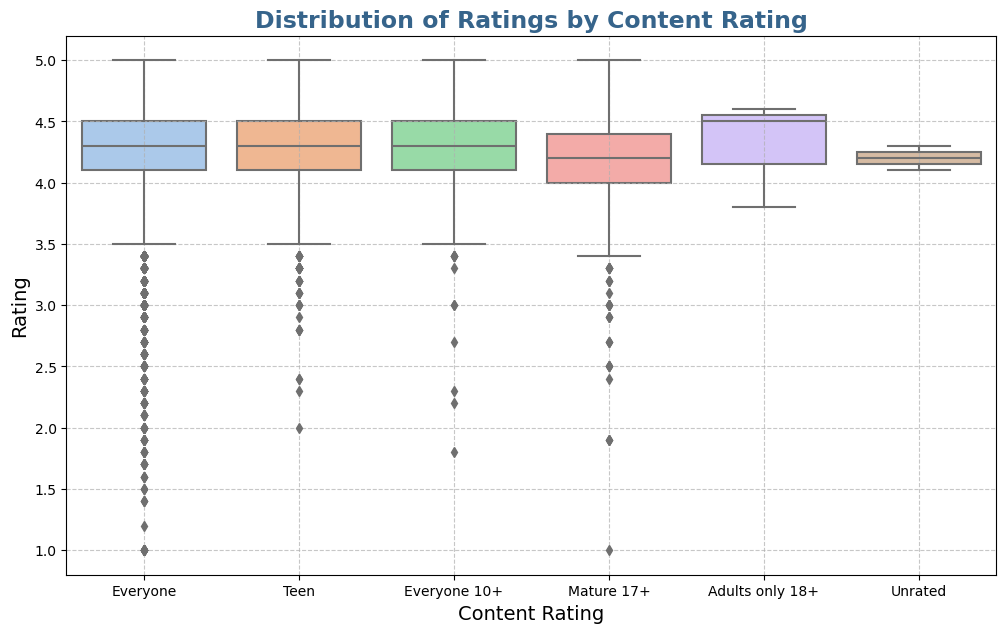

In [412]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Content_Rating", y ="Rating",data = data,palette= 'pastel')
plt.title("Distribution of Ratings by Content Rating", size=17,fontweight='bold',color = "#36648b")
plt.xlabel("Content Rating", size=14,)
plt.ylabel("Rating", size=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

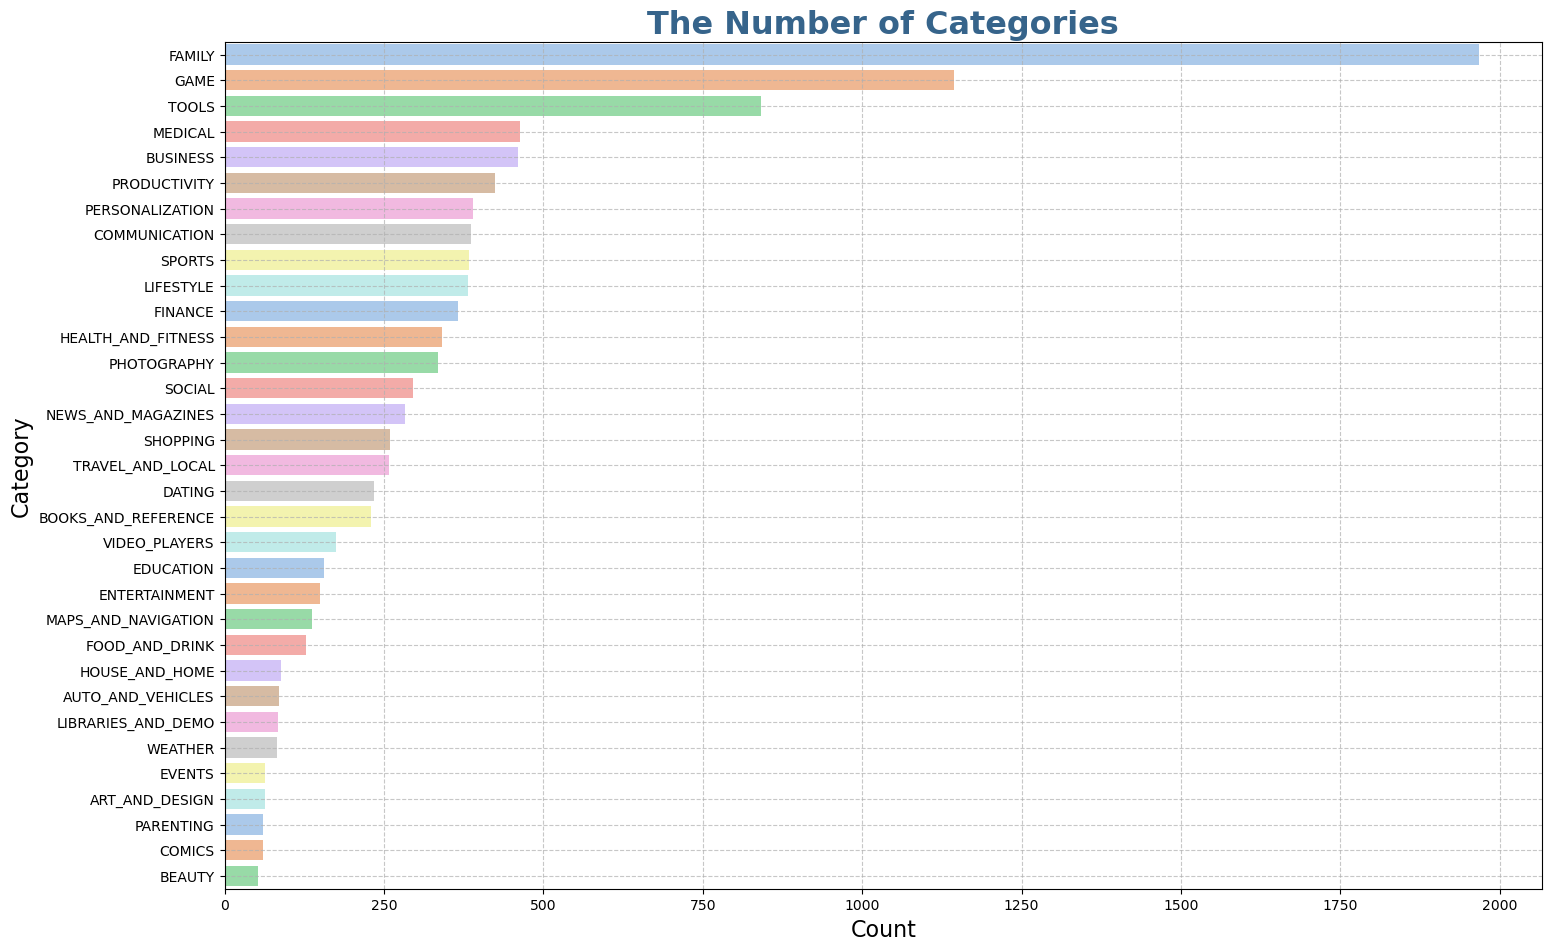

In [413]:
cat_num = data.Category.value_counts()
plt.figure(figsize=(17, 11))
sns.barplot(x=cat_num,y=cat_num.index,data=data,palette= 'pastel')
plt.title("The Number of Categories", size=23, fontweight='bold',color = "#36648b")
plt.xlabel("Count", size=16)
plt.ylabel("Category", size=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

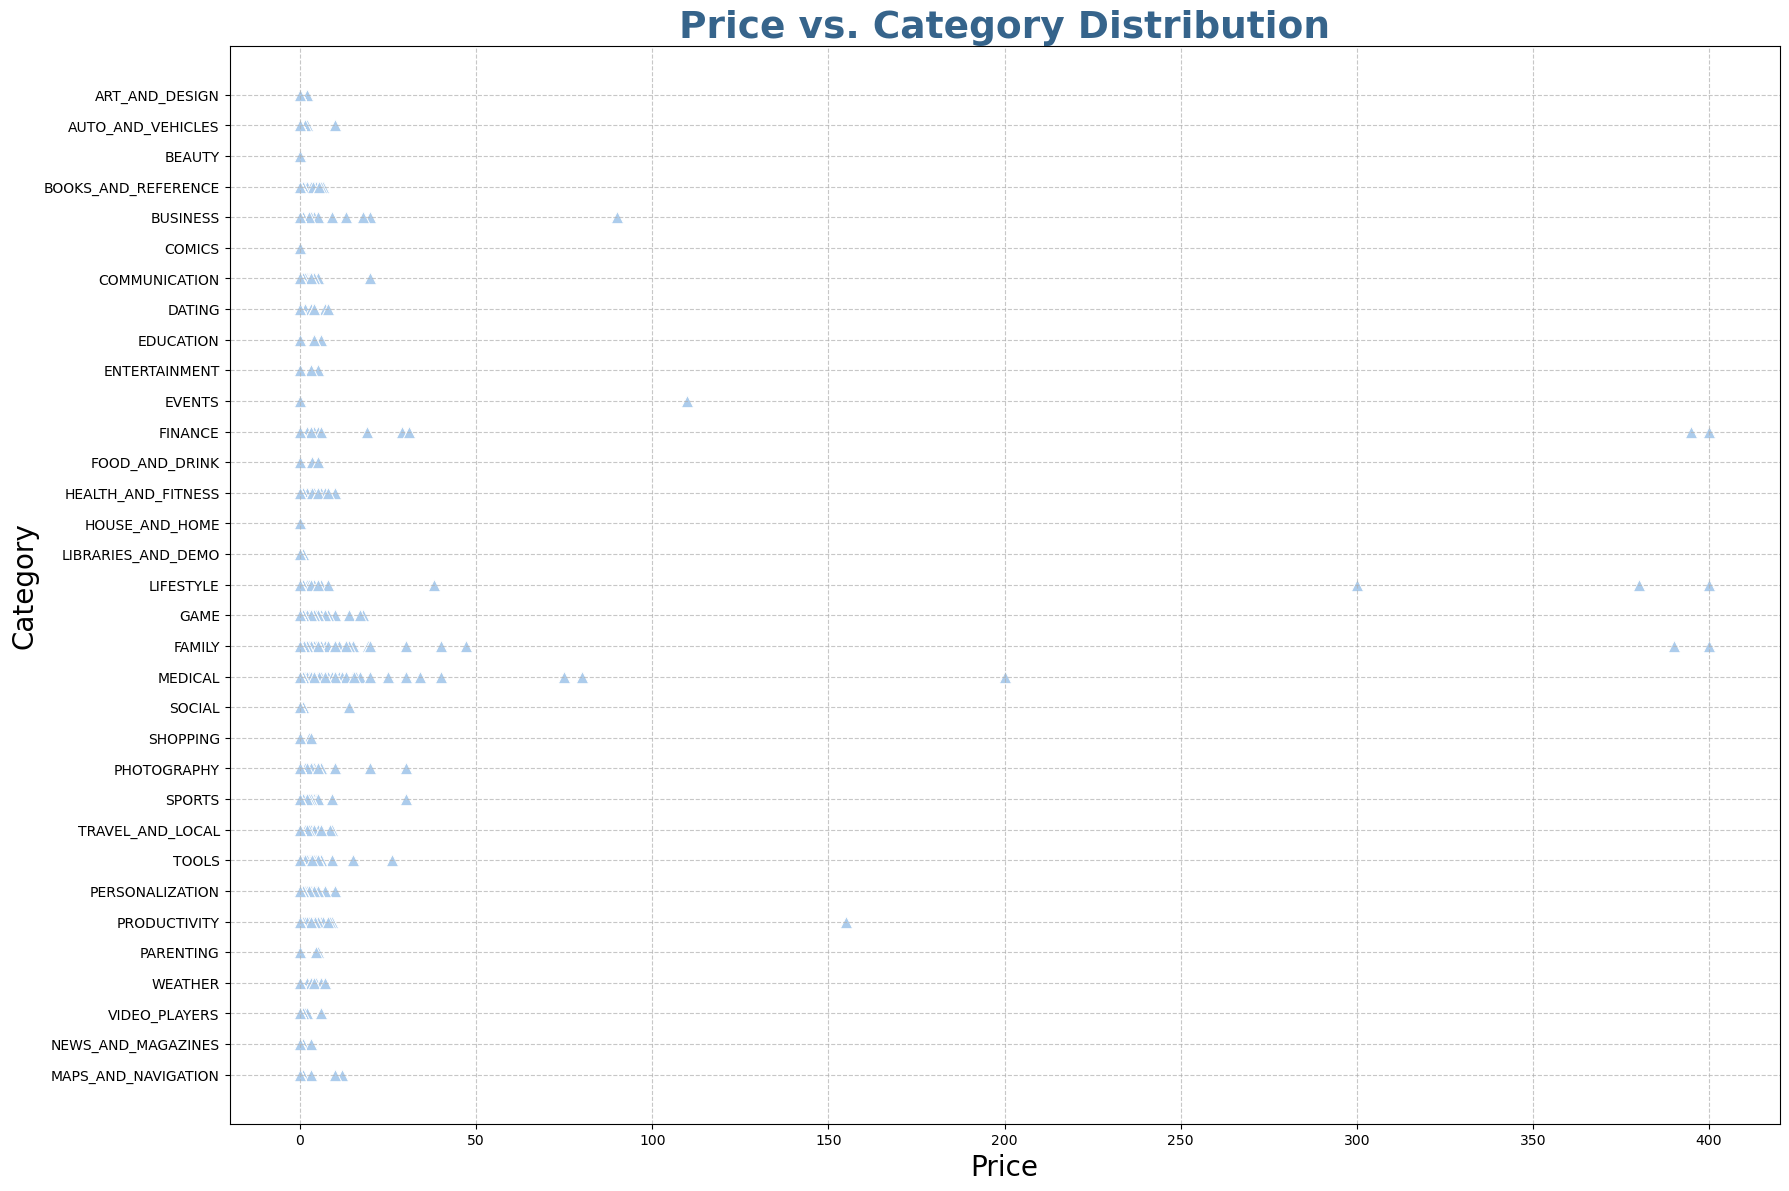

In [414]:
plt.figure(figsize=(20, 14))
sns.scatterplot( x = "Price" , y = "Category", data = data, s=80, marker="^",color= "#acccec" )
plt.title("Price vs. Category Distribution", fontsize=27,fontweight='bold',color = "#36648b")
plt.xlabel("Price", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

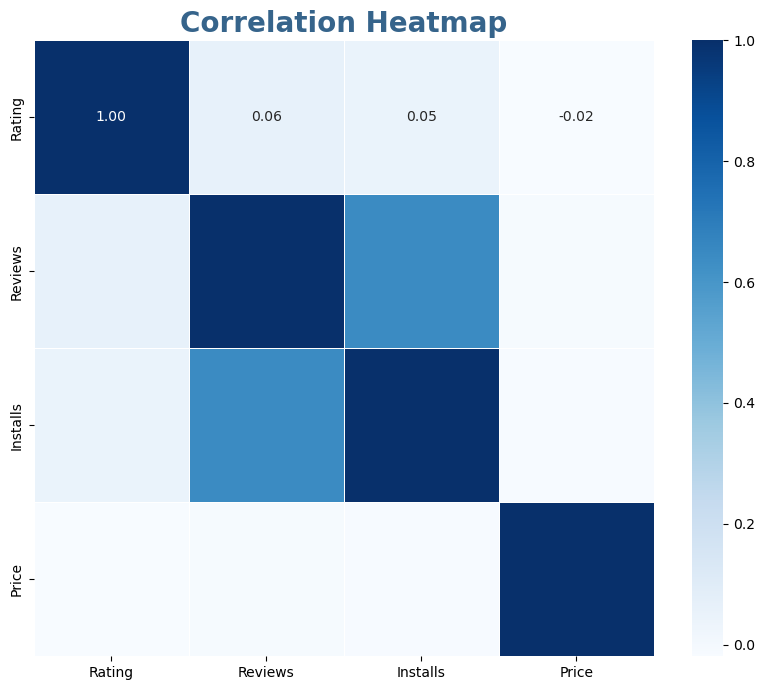

In [415]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap',fontsize=20,fontweight='bold',color = "#36648b")
plt.show()

# Graphic Results

*The number of free apps constitutes a large portion of the total number of apps.*

*"Paid" apps generally have higher average ratings, and the median rating is also higher compared to "Free" apps. There are outliers present for both types of apps, but they are more prominent among "Free" apps. For "Free" apps, the ratings are spread over a wider range, indicating greater variability in ratings. "Paid" apps receive higher ratings within a narrower range.*

*The "Everyone" category clearly has the highest number of apps, with over 8,000 apps falling into this category. The "Teen" and "Mature 17+" categories have relatively fewer apps. The other categories ("Everyone 10+", "Adults only 18+", "Unrated") have a significantly lower number of apps.*

*The average ratings in the “Adults only 18+” and “Unrated” categories appear to be relatively high. Outliers are observed in the "Everyone 10+" and "Mature 17+" categories, indicating that certain apps are rated very differently compared to others within the same category. Overall, the majority of ratings across each content rating category fall within the 4-5 range.*

*The "FAMILY" category has the highest number of apps, with over 2,000. Other categories like "GAME", "TOOLS", "MEDICAL", and "BUSINESS" also have a high number of apps. On the other hand, categories such as "BEAUTY", "COMICS", and "AUTO_AND_VEHICLES" have fewer apps.*

*The most paid apps are in the finance, lifestyle, and family categories.*

*A correlation of 0.66 is observed between Rating and Reviews. This indicates that applications with more reviews are likely to have higher ratings.There is a high positive correlation of 0.86 between Installs and Reviews. This suggests that applications with more installs tend to receive more reviews.The correlation between Price and other variables is very weak, close to 0. This indicates that there is little to no strong relationship between the price and rating, installs, or reviews.*